In [1]:
import numpy as np
import h5py
import os

In [2]:
directory = "/home/jp/AWA_DATA/12-05_6DReconstruction"
fname = os.path.join(directory, "13ARV1_1701818586.h5")

In [3]:
f = h5py.File(fname)

In [4]:
list(f.keys())

['images']

In [5]:
imgs = f['images']

In [24]:
imgs.attrs.keys()

<KeysViewHDF5 ['AWA:Bira3Ctrl:Ch10', 'AWA:Bira4Ctrl:Ch01', 'AWAVXI11ICT:Ch4', 'array_data_suffix', 'array_n_cols_suffix', 'array_n_rows_suffix', 'background_file', 'bounding_box_half_width', 'charge_atol', 'extra_pvs', 'min_log_intensity', 'n_fitting_restarts', 'pi:QBCR1:Ch7:EnablePulse', 'resolution', 'return_statistics', 'roi', 'save_image_location', 'screen_name', 'target_charge', 'target_charge_pv', 'testing', 'threshold', 'visualize', 'wait_time']>

In [26]:
quad_pv_name = 'AWA:Bira3Ctrl:Ch10'
tdc_pv_name = 'pi:QBCR1:Ch7:EnablePulse'
bend_pv_name = 'AWA:Bira4Ctrl:Ch01'


In [60]:
p0c = 62.0e6 # design momentum eV/c
C_LIGHT = 299792458
TDC_V = 3.7e6 # need to double check this value // verify calibration value
BEND_G = 20.0*3.1416/180.0/0.3018 # double check 0.3018 value
def quad_pv_to_k(quad_pv_value, p0c):
    gradient = quad_pv_value*100*1.32e-2/1.29*1.04
    beam_rigidity = p0c / C_LIGHT
    return gradient / beam_rigidity

def tdc_pv_to_v(tdc_pv_value):
    if tdc_pv_value == 0:
        return 0
    elif tdc_pv_value == 1:
        return TDC_V
    else: 
        raise ValueError("TDC PV value must be 0 or 1")
    
def bend_pv_to_g(bend_pv_value):
    if bend_pv_value == 0:
        return 2.22e-16 #machine epsilon for differentiability
    elif bend_pv_value == 1:
        return BEND_G
    else:
        raise ValueError("BEND PV value must be 0 or 1")

In [68]:
imgs.attrs[quad_pv_name]

-1.0

In [62]:
quad_pv_to_k(imgs.attrs[quad_pv_name], p0c)

-5.145725010532633

In [69]:
tdc_pv_to_v(imgs.attrs[tdc_pv_name])

0

In [70]:
bend_pv_to_g(imgs.attrs[bend_pv_name])

2.22e-16

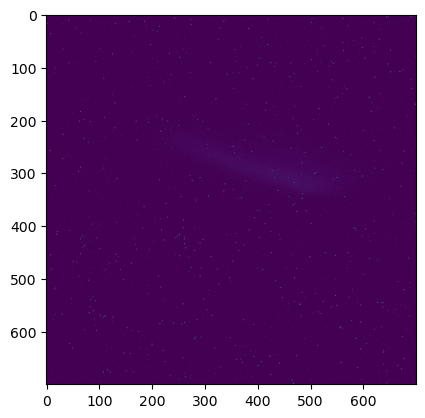

In [33]:
import matplotlib.pyplot as plt
plt.imshow(imgs[4])

In [ ]:
def read_file(fname):
    with h5py.File(fname) as f:
        data_x = np.array((
            f["images"].attrs["quad_pv_name"],
            f["images"].attrs["tdc_name"],
            f["images"].attrs["dipole_name"],
        ))
        images = f["images"][:]

    return 0, images